In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc

from herbie import paint

import matplotlib.pyplot as plt

In [2]:
# Just open the entire GRIB2 files (opened in multiple DataSets)
rtma = Herbie("2024-06-11 00:00", model="rtma").xarray(verbose=True)
urma = Herbie("2024-06-11 00:00", model="urma").xarray(verbose=True)

✅ Found ┊ model=rtma ┊ product=anl ┊ 2024-Jun-11 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/Users/john_b_needham/data/rtma/20240611]


/opt/anaconda3/lib/python3.13/site-packages/herbie/core.py:1119: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Success! Downloaded RTMA from aws                 
	src: https://noaa-rtma-pds.s3.amazonaws.com/rtma2p5.20240611/rtma2p5.t00z.2dvaranl_ndfd.grb2_wexp
	dst: /Users/john_b_needham/data/rtma/20240611/rtma2p5.t00z.2dvaranl_ndfd.grb2_wexp
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=urma ┊ product=anl ┊ 2024-Jun-11 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/Users/john_b_needham/data/urma/20240611]


/opt/anaconda3/lib/python3.13/site-packages/herbie/core.py:1119: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Success! Downloaded URMA from aws                 
	src: https://noaa-urma-pds.s3.amazonaws.com/urma2p5.20240611/urma2p5.t00z.2dvaranl_ndfd.grb2_wexp
	dst: /Users/john_b_needham/data/urma/20240611/urma2p5.t00z.2dvaranl_ndfd.grb2_wexp
Note: Returning a list of [6] xarray.Datasets because cfgrib opened with multiple hypercubes.


In [3]:
rtma[3]

<xarray.Dataset> Size: 105MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2024-06-11
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB ...
    d2m                  (y, x) float32 15MB ...
    sh2                  (y, x) float32 15MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 anl
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /Users/john_b_needham/data/rtma/20240611/rtma2p5...
    local_grib:              /Users/john_b_needham/data/rtma/20240611/rtma2p5...
    search:                  None

In [4]:
urma[3]

<xarray.Dataset> Size: 105MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2024-06-11
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB ...
    d2m                  (y, x) float32 15MB ...
    sh2                  (y, x) float32 15MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   urma
    product:                 anl
    description:             CONUS Un-Restricted Mesoscale Analysis (URMA)
    remote_grib:             /Users/john_b_needham/data/urma/20240611/urma2p5...
    local_grib:              /Users/john_b_needham/data/urma/20240611/urma2p5...
    search:                  None

In [5]:
print("RTMA:", rtma[3].herbie.crs)
print("URMA:", urma[3].herbie.crs)

RTMA: +proj=lcc +ellps=sphere +a=6371200.0 +b=6371200.0 +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=25.0 +no_defs +type=crs
URMA: +proj=lcc +ellps=sphere +a=6371200.0 +b=6371200.0 +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=25.0 +no_defs +type=crs


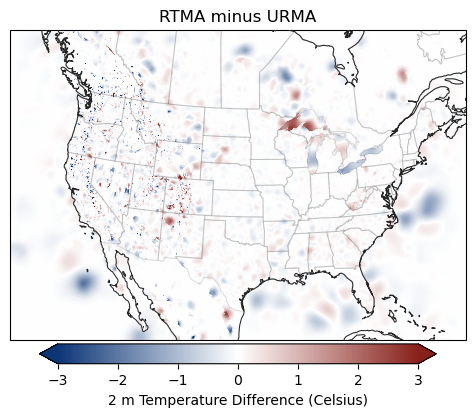

In [6]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[3].longitude,
    rtma[3].latitude,
    (rtma[3].t2m - urma[3].t2m),
    transform=pc,
    cmap="herbie.white",  # this is a Custom herbie colormap :)
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="2 m Temperature Difference (Celsius)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)